# Configurações

In [107]:
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
from PIL import Image

# Carregando Dataset

In [110]:
def unzip(zip_file=None, extract_to="extracted_images"):
    try:
        with zipfile.ZipFile(zip_file, 'r') as z:
            # Cria o diretório de extração se ele não existir
            if not os.path.exists(extract_to):
                os.makedirs(extract_to)
            
            z.extractall(extract_to)
            print("Extracted all to", extract_to)
    except zipfile.BadZipFile:
        print("Invalid file")

In [112]:
unzip(zip_file='./attdataface.zip', extract_to='./kaggle/input/att-database-of-faces/')

Extracted all to ./kaggle/input/att-database-of-faces/


In [114]:
paths = ["./kaggle/input/att-database-of-faces/s" + str(i) for i in range(1, 41)]
cnt = 0
Data = np.zeros((400, 10304))
labels = np.zeros((400, 1))
for i in range(40):
    labels[i * 10 : (i + 1) * 10] = i + 1
for path in paths:
    files = os.listdir(path)
    for file in files:
        img = Image.open(path + "/" + file)
        np_img = np.array(img)
        np_img = np_img.flatten()
        Data[cnt] = np_img
        cnt += 1

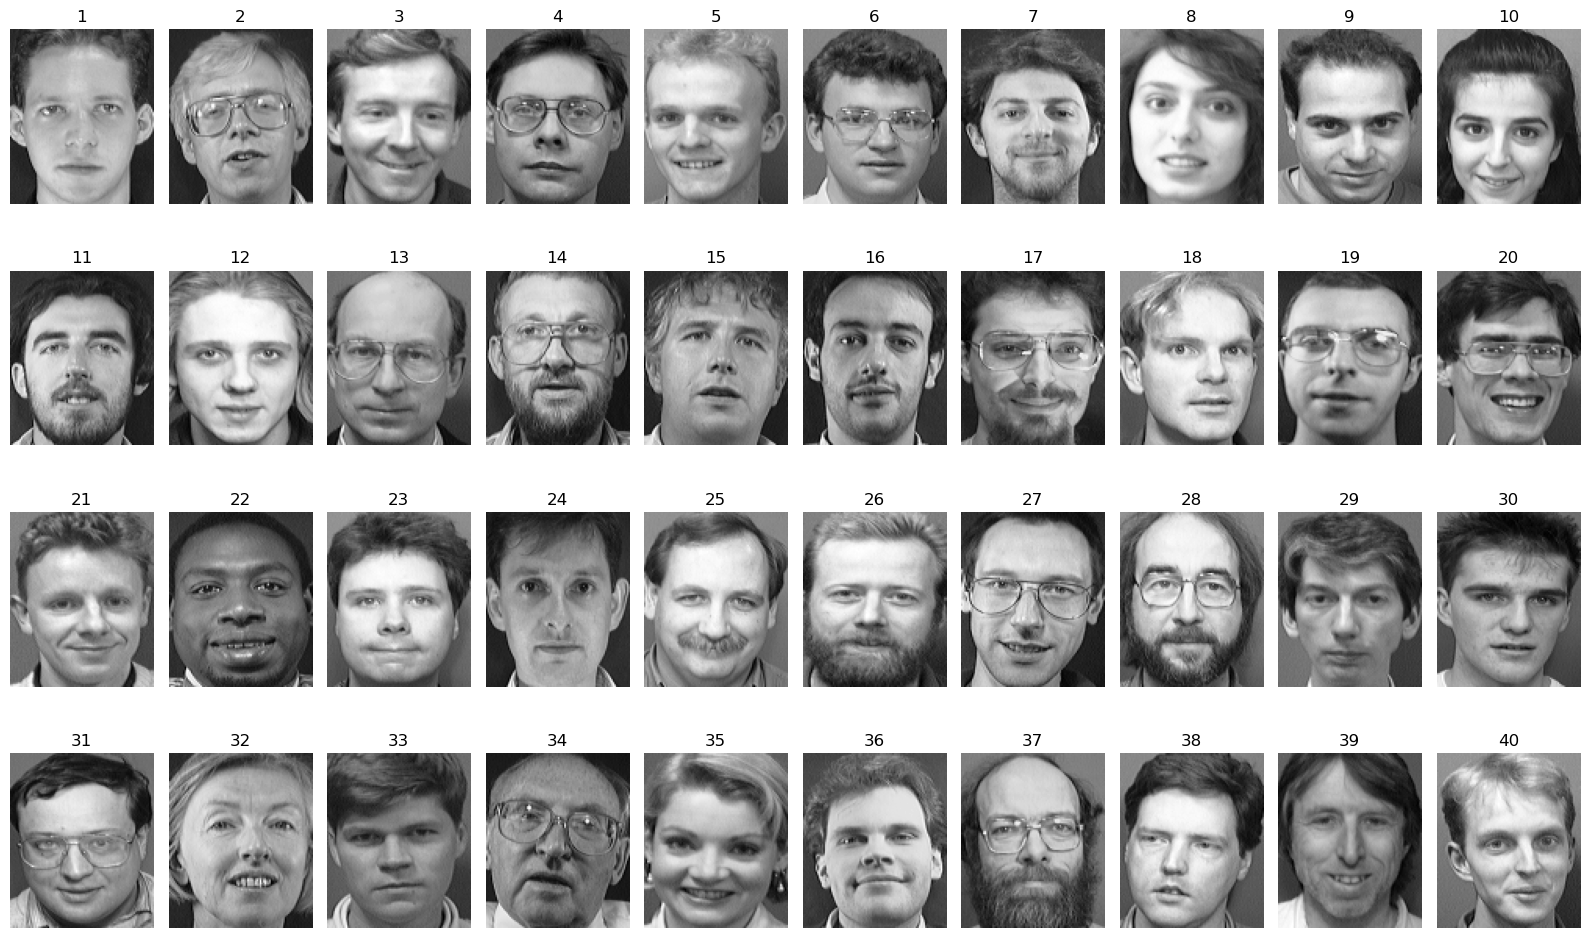

In [116]:
image_height = 112
image_width = 92

fig, axs = plt.subplots(4, 10, figsize=(16, 10))

# Flatten the array of axes
axs = axs.ravel()

for i in range(40):
    image_array = np.reshape(Data[(i) * 10], (image_height, image_width))
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title(i + 1)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

# 1. Versão sequencial do PCA

### 1. Normalização

In [13]:
def normalize(x, xmin, xmax):
    """
    Normaliza o valor x usando a fórmula (x - xmin) / (xmax - xmin).

    Parâmetros:
    x (numpy array): O array de valores a ser normalizado.
    xmin (float): O valor mínimo do intervalo.
    xmax (float): O valor máximo do intervalo.

    Retorna:
    numpy array: O array normalizado.
    """
    if xmin == xmax:
        raise ValueError("xmin e xmax não podem ser iguais, pois causariam uma divisão por zero.")
    
    return (x - xmin) / (xmax - xmin)

In [15]:
def normalize_image(image_array):
    """
    Normaliza os pixels de uma imagem.

    Parâmetros:
    image_array (numpy array): Array numpy da imagem a ser normalizada.

    Retorna:
    numpy array: O array da imagem normalizada.
    """
    
    image_array = image_array.astype(np.float32)
    
    xmin, xmax = image_array.min(), image_array.max()
    
    normalized_array = normalize(image_array, xmin, xmax)
    
    # Converte o array normalizado de volta para a faixa de 0-255
    normalized_array = (normalized_array * 255).astype(np.uint8)
    
    return normalized_array

### 2. Cálculo da Face média